**Import thư viện**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB


from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Import thư viện và gán giá trị nhãn real: 1, fake: 0 và xử lí column.

In [13]:
train = pd.read_excel('/content/Constraint_English_Train.xlsx')
test = pd.read_excel('/content/Constraint_English_Val.xlsx')
/
train['text'] = train.tweet
train["text"] = train["text"].astype(str)

test['text'] = test.tweet
test["text"] = test["text"].astype(str)

def classes_def(x):
    if x ==  "real":
        return "1"
    else:
        return "0"

train['new_lb']=train['label'].apply(lambda x:classes_def(x))
test['new_lb']=test['label'].apply(lambda x:classes_def(x))

train.new_lb.value_counts(normalize= True)
test.new_lb.value_counts(normalize= True)

1    0.523364
0    0.476636
Name: new_lb, dtype: float64

- Sau khi thực nghiệm, nhóm thấy rằng chỉ thực hiện hàm xóa URL, link, html sẽ cho kết quả có độ chính xác cao nhất. 
- Hàm chuyển in hóa -> in thường không ảnh hưởng đáng kể đến kết quả.

In [14]:
#Xóa url, link và các thẻ html
def remove_urls(text):
    url_remove = re.compile(r'https?://\S+|www\.\S+')
    return url_remove.sub(r'', text)
train['text_new']=train['text'].apply(lambda x:remove_urls(x))
test['text_new']=test['text'].apply(lambda x:remove_urls(x))

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
train['text']=train['text_new'].apply(lambda x:remove_html(x))
test['text']=test['text_new'].apply(lambda x:remove_html(x))

In [15]:
#Chuyển các chữ in hoa thành in thường (Có thể áp dụng hoặc không)
def lower(text):
    low_text= text.lower()
    return low_text
train['text_new']=train['text'].apply(lambda x:lower(x))
test['text_new']=test['text'].apply(lambda x:lower(x))

In [16]:
train = train.drop(['id','tweet','label','text_new'], axis = 1)
test = test.drop(['id','tweet','label','text_new'], axis = 1)

In [17]:
X_train = train.iloc[:,0].values
y_train = train.iloc[:, -1].values 
X_test = test.iloc[:,0].values
y_test = test.iloc[:, -1].values

Chạy một trong hai thuật toán word embedding.
Ở đây, nhóm sẽ xử lí bằng Count Vectorizer vì sẽ cho kết quả cao có độ chính xác cao hơn một chút. 

In [18]:
#Xu ly bang Count Vectorizer
count_vectorizer = CountVectorizer(binary=True)
X_train = count_vectorizer.fit_transform(X_train)
X_test = count_vectorizer.transform(X_test)

In [ ]:
#Xu ly bang TF-IDF 
vec = TfidfVectorizer(binary=True, use_idf=True)
X_train = vec.fit_transform(X_train) 
X_test = vec.transform(X_test) 

**Chạy một trong 4 thuận toán train model.**

In [ ]:
#Support Vector classifier
model = SVC()

In [23]:
#Logistic Regression Classifier
model = LogisticRegression(random_state=0)

In [ ]:
#Linear SVC
model = LinearSVC()

In [8]:
#MultinomialNB
model = MultinomialNB()

In [24]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

**Hiển thị kết quả trên 4 độ đo.**

In [25]:
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred, digits=4,
                                    target_names= train['new_lb'].unique()))

				CLASSIFICATIION METRICS

              precision    recall  f1-score   support

           1     0.9254    0.9490    0.9371      1020
           0     0.9525    0.9304    0.9413      1120

    accuracy                         0.9393      2140
   macro avg     0.9389    0.9397    0.9392      2140
weighted avg     0.9396    0.9393    0.9393      2140



Accuracy: 0.9392523364485982


Text(25.5, 0.5, 'True Value')

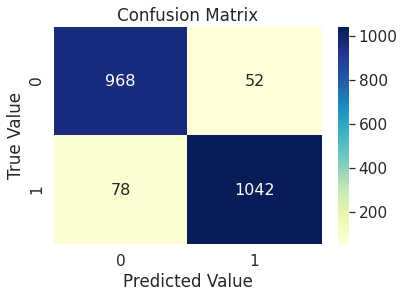

In [26]:
cm=confusion_matrix(y_test, y_pred)
cm_df=pd.DataFrame(cm,index=[0,1],columns=[0,1])
print("Accuracy:",accuracy_score(y_test, y_pred))

sns.set(font_scale=1.4,color_codes=True,palette="deep")
sns.heatmap(cm_df,annot=True,annot_kws={"size":16},fmt="d",cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")